In [1]:
from datasets import load_dataset

data = load_dataset("werty1248/MoE-Router-Dataset-Statistic-MMMLU-Qwen3-30B-A3B", split='train', cache_dir = "./", num_proc = 8)

README.md:   0%|          | 0.00/810 [00:00<?, ?B/s]

C:\Users\USER\anaconda3\envs\basic\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\USER\.cache\huggingface\hub\datasets--werty1248--MoE-Router-Dataset-Statistic-MMMLU-Qwen3-30B-A3B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Resolving data files:   0%|          | 0/29 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/29 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/56168 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/27 [00:00<?, ?it/s]

In [170]:
data

Dataset({
    features: ['prompt', 'output', 'subject', 'language', 'think', 'prompt_stat', 'output_stat', 'first_stat', 'last_stat', 'total_stat'],
    num_rows: 56168
})

In [6]:
import numpy as np

In [228]:
ko_data = data.filter(lambda x : x['language'] == 'ko', num_proc = 4)
en_data = data.filter(lambda x : x['language'] == 'en', num_proc = 4)

ko_t_data = ko_data.filter(lambda x : x['think'] == 'think', num_proc = 4)
ko_nt_data = ko_data.filter(lambda x : x['think'] == 'nonthink', num_proc = 4)

en_t_data = en_data.filter(lambda x : x['think'] == 'think', num_proc = 4)
en_nt_data = en_data.filter(lambda x : x['think'] == 'nonthink', num_proc = 4)

In [229]:
np.array([[1,1,1,1],[2,2,2,2]]).sum(axis=0)

array([3, 3, 3, 3])

In [230]:
output_ko_nt = np.array(ko_nt_data['output_stat'], dtype=np.int64).sum(axis=0)
output_ko_nt = output_ko_nt / output_ko_nt.sum(axis = -1, keepdims=True)
output_ko_t = np.array(ko_t_data['output_stat'], dtype=np.int64).sum(axis=0)
output_ko_t = output_ko_t / output_ko_t.sum(axis = -1, keepdims=True)
output_en_nt = np.array(en_nt_data['output_stat'], dtype=np.int64).sum(axis=0)
output_en_nt = output_en_nt / output_en_nt.sum(axis = -1, keepdims=True)
output_en_t = np.array(en_t_data['output_stat'], dtype=np.int64).sum(axis=0)
output_en_t = output_en_t / output_en_t.sum(axis = -1, keepdims=True)

first_ko_nt = np.array(ko_nt_data['first_stat'], dtype=np.int64).sum(axis=0)
first_ko_nt = first_ko_nt / first_ko_nt.sum(axis = -1, keepdims=True)
last_ko_nt = np.array(ko_nt_data['last_stat'], dtype=np.int64).sum(axis=0)
last_ko_nt = last_ko_nt / last_ko_nt.sum(axis = -1, keepdims=True)

In [415]:

first_en_nt = np.array(en_nt_data['first_stat'], dtype=np.int64).sum(axis=0)
first_en_nt = first_en_nt / first_en_nt.sum(axis = -1, keepdims=True)
last_en_nt = np.array(en_nt_data['last_stat'], dtype=np.int64).sum(axis=0)
last_en_nt = last_en_nt / last_en_nt.sum(axis = -1, keepdims=True)

In [402]:

first_ko_t = np.array(ko_t_data['first_stat'], dtype=np.int64).sum(axis=0)
first_ko_t = first_ko_t / first_ko_t.sum(axis = -1, keepdims=True)
last_ko_t = np.array(ko_t_data['last_stat'], dtype=np.int64).sum(axis=0)
last_ko_t = last_ko_t / last_ko_t.sum(axis = -1, keepdims=True)

first_en_t = np.array(en_t_data['first_stat'], dtype=np.int64).sum(axis=0)
first_en_t = first_en_t / first_en_t.sum(axis = -1, keepdims=True)
last_en_t = np.array(en_t_data['last_stat'], dtype=np.int64).sum(axis=0)
last_en_t = last_en_t / last_en_t.sum(axis = -1, keepdims=True)

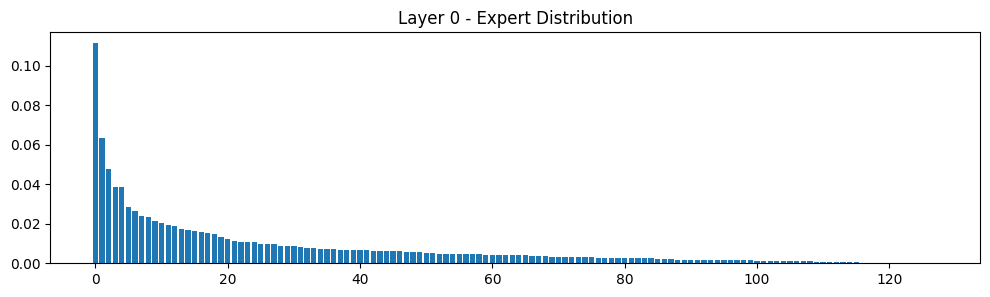

In [423]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.bar(range(128), sorted(output_ko_nt[0])[::-1])
plt.title("Layer 0 - Expert Distribution")
plt.savefig("images/dist.png")

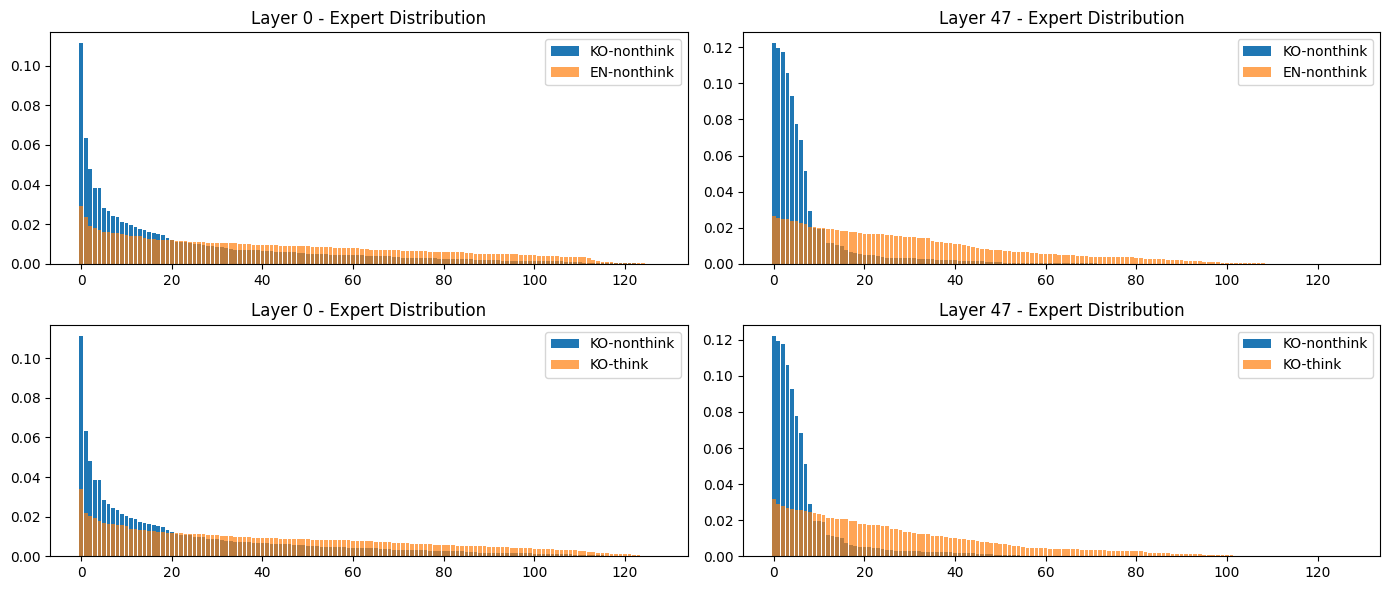

In [424]:
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
plt.bar(range(128), sorted(output_ko_nt[0])[::-1], label = 'KO-nonthink')
plt.bar(range(128), sorted(output_en_nt[0])[::-1], alpha = 0.7, label = 'EN-nonthink')
plt.legend()
plt.title("Layer 0 - Expert Distribution")
plt.subplot(2,2,2)
plt.bar(range(128), sorted(output_ko_nt[-1])[::-1], label = 'KO-nonthink')
plt.bar(range(128), sorted(output_en_nt[-1])[::-1], alpha = 0.7, label = 'EN-nonthink')
plt.legend()
plt.title("Layer 47 - Expert Distribution")
plt.subplot(2,2,3)
plt.bar(range(128), sorted(output_ko_nt[0])[::-1], label = 'KO-nonthink')
plt.bar(range(128), sorted(output_ko_t[0])[::-1], alpha = 0.7, label = 'KO-think')
plt.legend()
plt.title("Layer 0 - Expert Distribution")
plt.tight_layout()
plt.subplot(2,2,4)
plt.bar(range(128), sorted(output_ko_nt[-1])[::-1], label = 'KO-nonthink')
plt.bar(range(128), sorted(output_ko_t[-1])[::-1], alpha = 0.7, label = 'KO-think')
plt.legend()
plt.title("Layer 47 - Expert Distribution")
plt.tight_layout()
plt.savefig("images/dist_comparison.png")

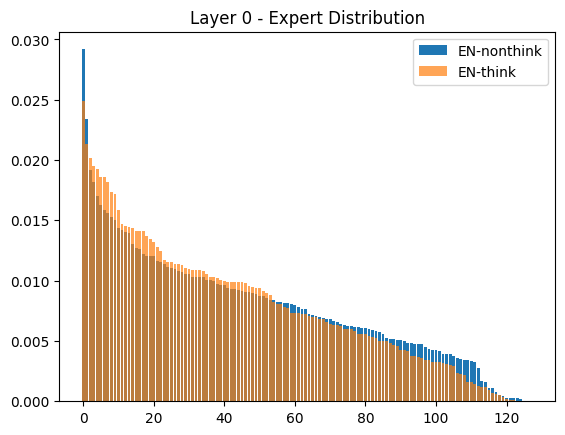

In [425]:

plt.bar(range(128), sorted(output_en_nt[0])[::-1], label = 'EN-nonthink')
plt.bar(range(128), sorted(output_en_t[0])[::-1], alpha = 0.7, label = 'EN-think')
plt.legend()
plt.title("Layer 0 - Expert Distribution")
plt.savefig("images/dist_comparison_en.png")

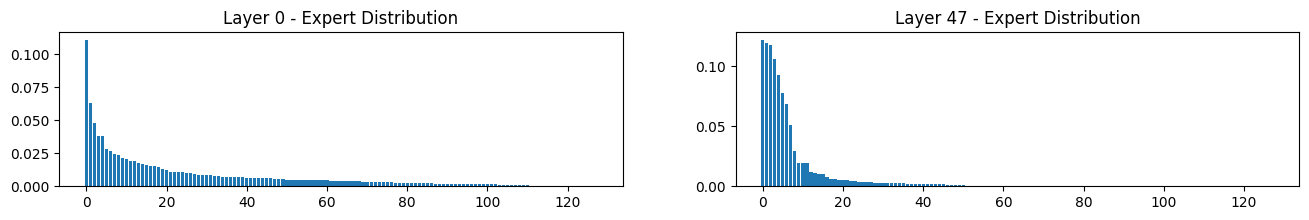

In [427]:
plt.figure(figsize=(16, 2))
plt.subplot(1, 2, 1)
plt.bar(range(128), sorted(output_ko_nt[0])[::-1])
plt.title("Layer 0 - Expert Distribution")
plt.subplot(1, 2, 2)
plt.bar(range(128), sorted(output_ko_nt[-1])[::-1])
plt.title("Layer 47 - Expert Distribution")
plt.savefig("images/dist_0_47.png")

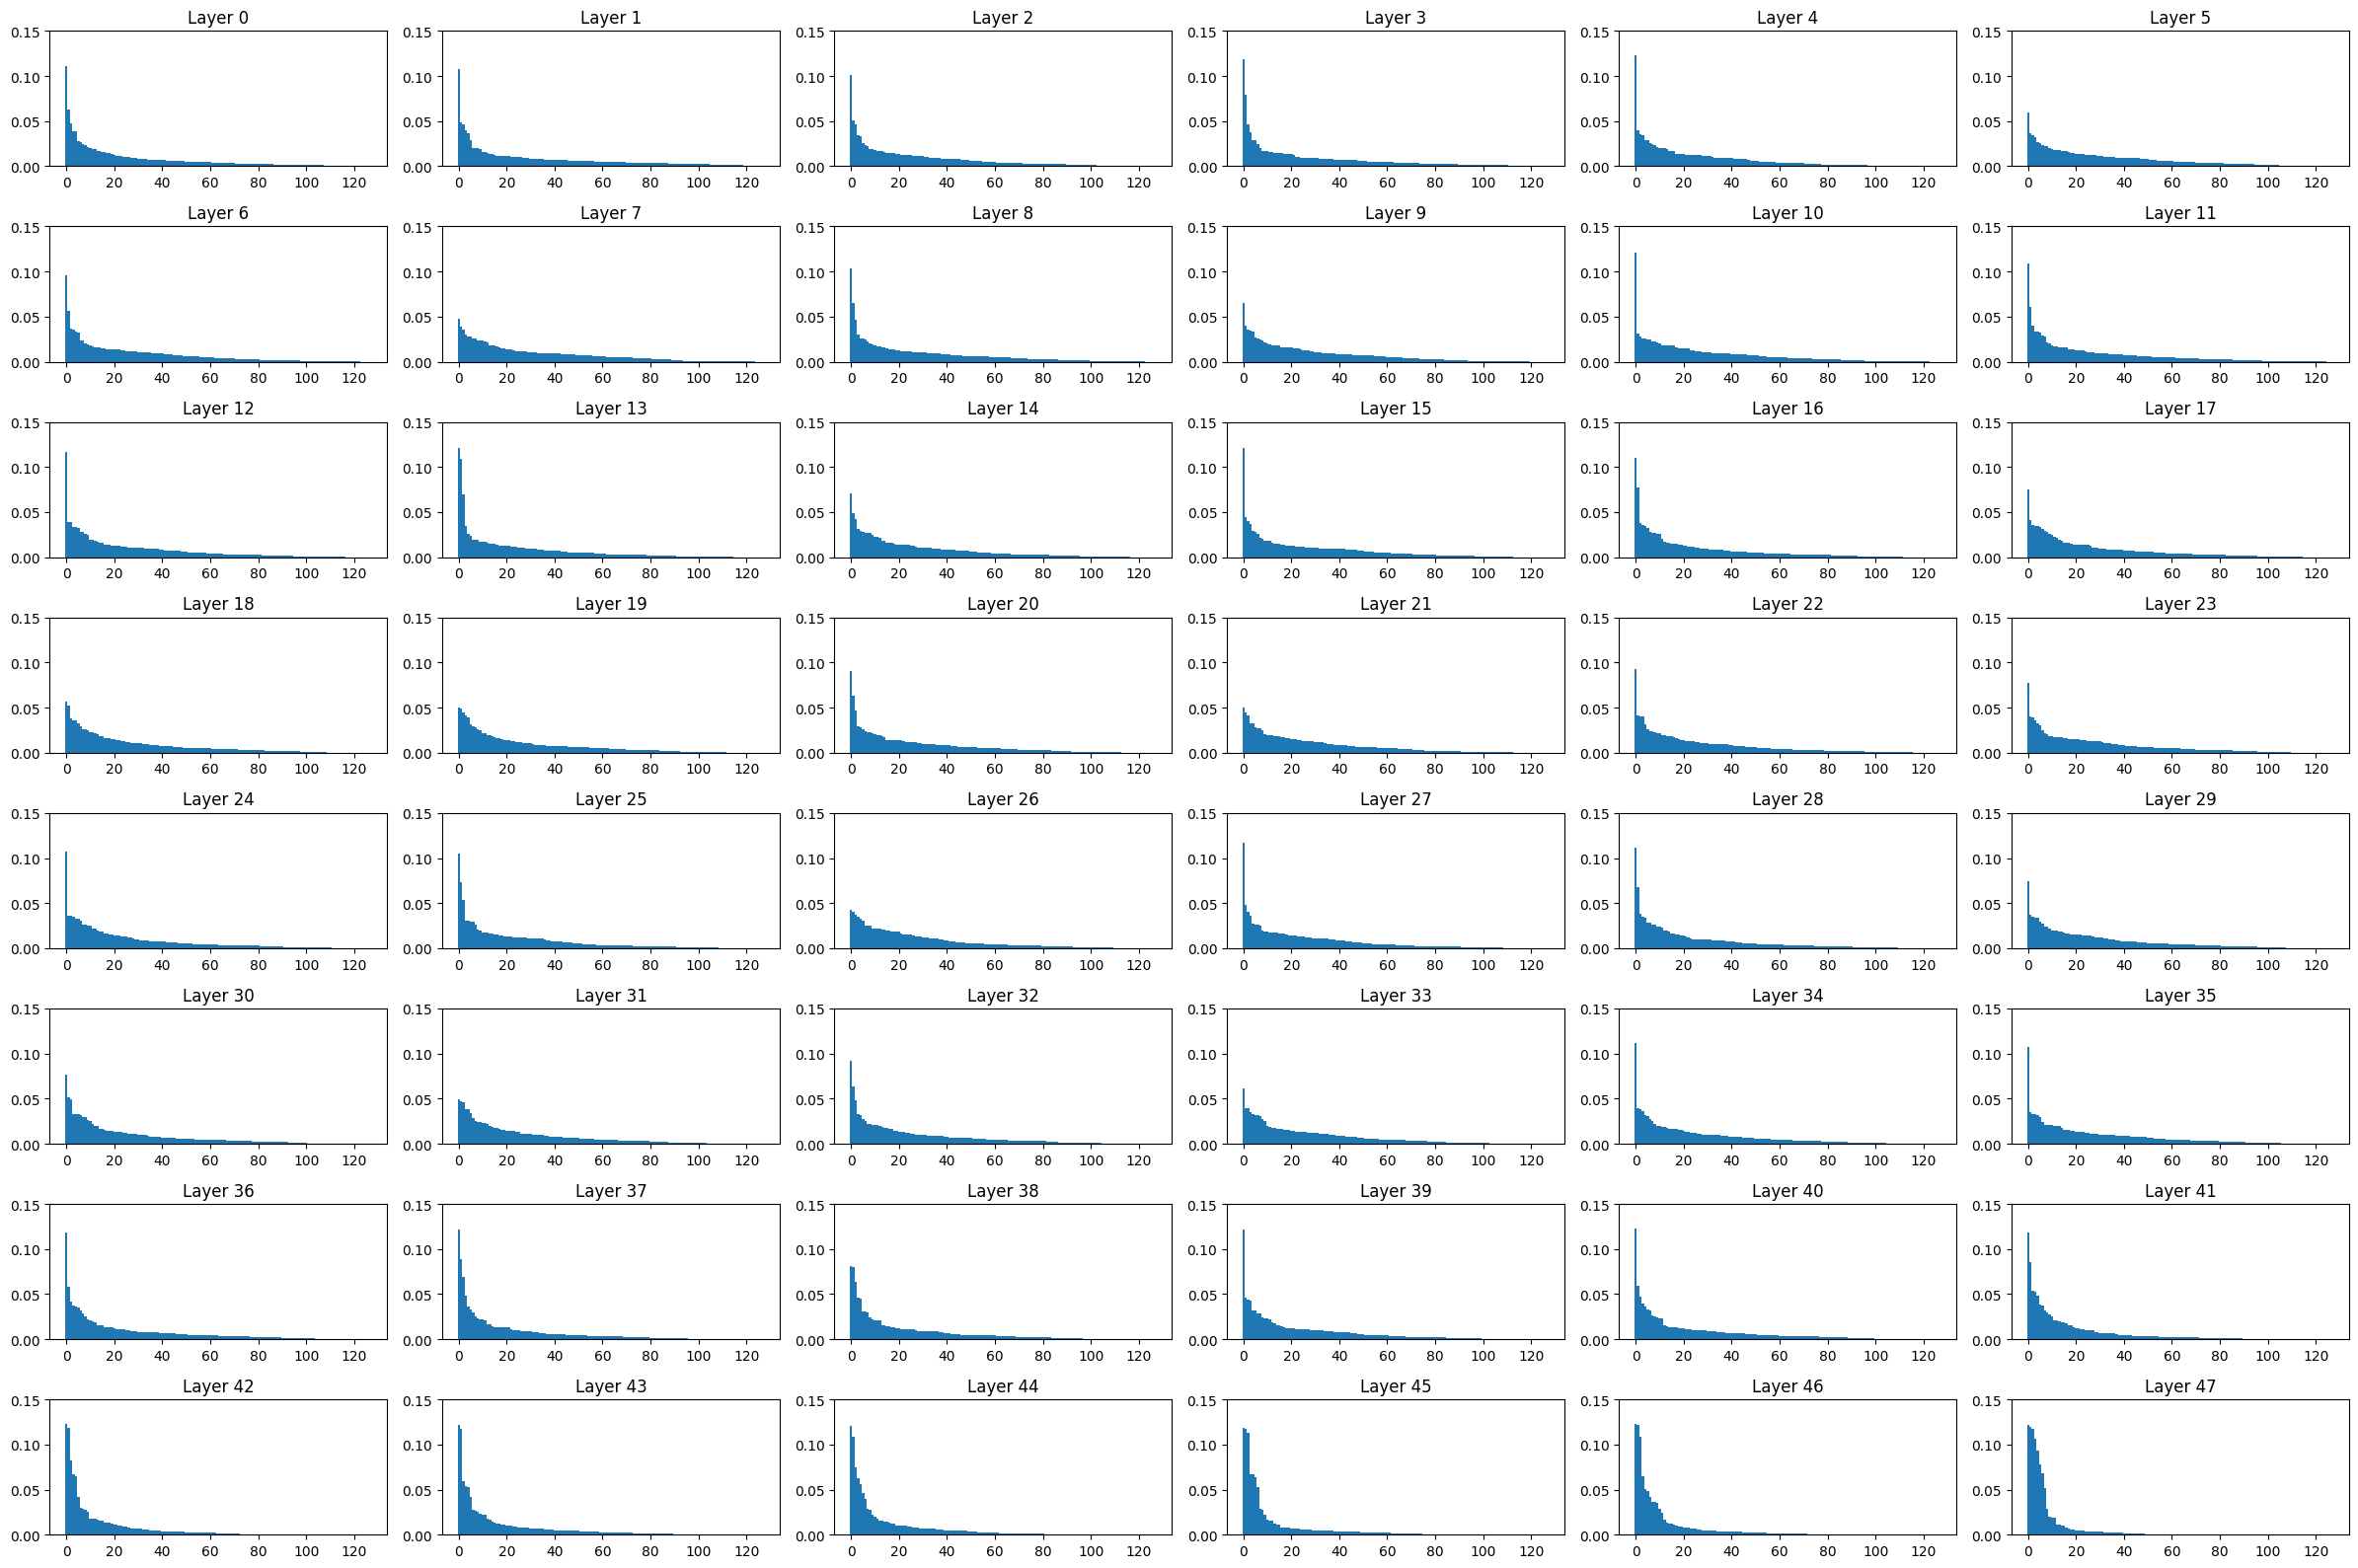

In [428]:
from tqdm.auto import tqdm
plt.figure(figsize=(24, 16))
for i in range(48):
    plt.subplot(8, 6, i+1)
    plt.bar(range(128), sorted(output_ko_nt[i])[::-1], width = 1.0)
    plt.title(f"Layer {i}")
    plt.ylim(0, 0.15)
plt.tight_layout()
plt.savefig("images/dist_full.png")

In [226]:
output_ko_nt[5].sum()

np.float64(2.723755991290915)

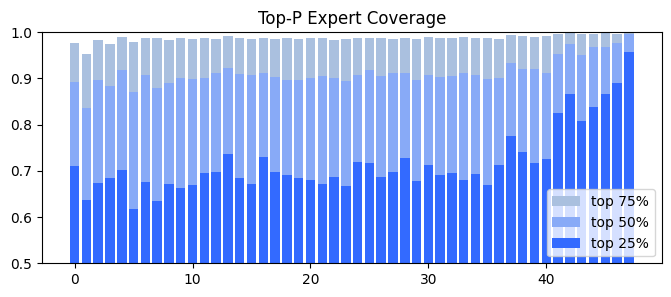

In [429]:
plt.figure(figsize=(8, 3))
plt.bar(range(48), [sum(sorted(output_ko_nt[i])[32:]) for i in range(48)], label='top 75%', color='#AAC0DF')
plt.bar(range(48), [sum(sorted(output_ko_nt[i])[64:]) for i in range(48)], label='top 50%', color='#88AAF7')
plt.bar(range(48), [sum(sorted(output_ko_nt[i])[96:]) for i in range(48)], label='top 25%', color='#336AFF')
plt.ylim(0.5, 1)
plt.legend(loc='lower right')

plt.title("Top-P Expert Coverage")
plt.savefig("images/top_p_expert_coverage.png")

In [241]:
tt_gap = output_ko_nt - output_en_nt

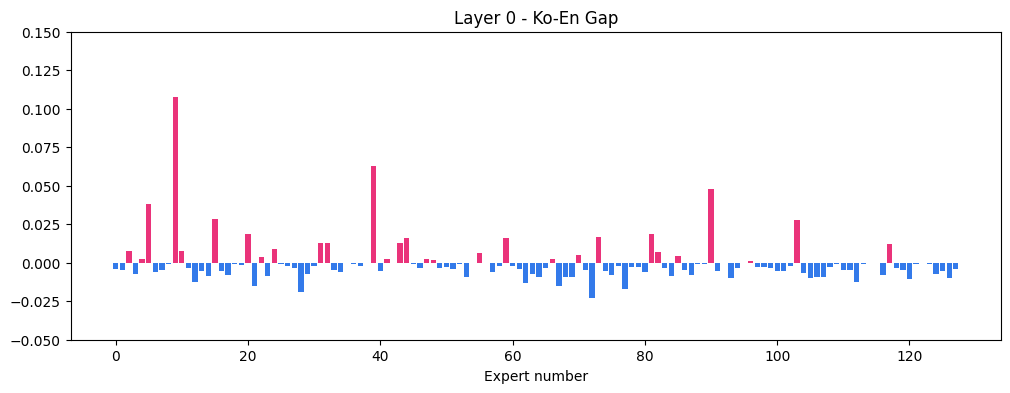

In [430]:
cmap = ['#EA337A', '#337AEA']
plt.figure(figsize=(12, 4))

plt.bar(range(128), tt_gap[0], color = [cmap[int(x < 0)] for x in tt_gap[0]])

plt.ylim(-0.05, 0.15)
plt.xlabel("Expert number")
plt.title("Layer 0 - Ko-En Gap")
plt.savefig("images/expert_gap.png")

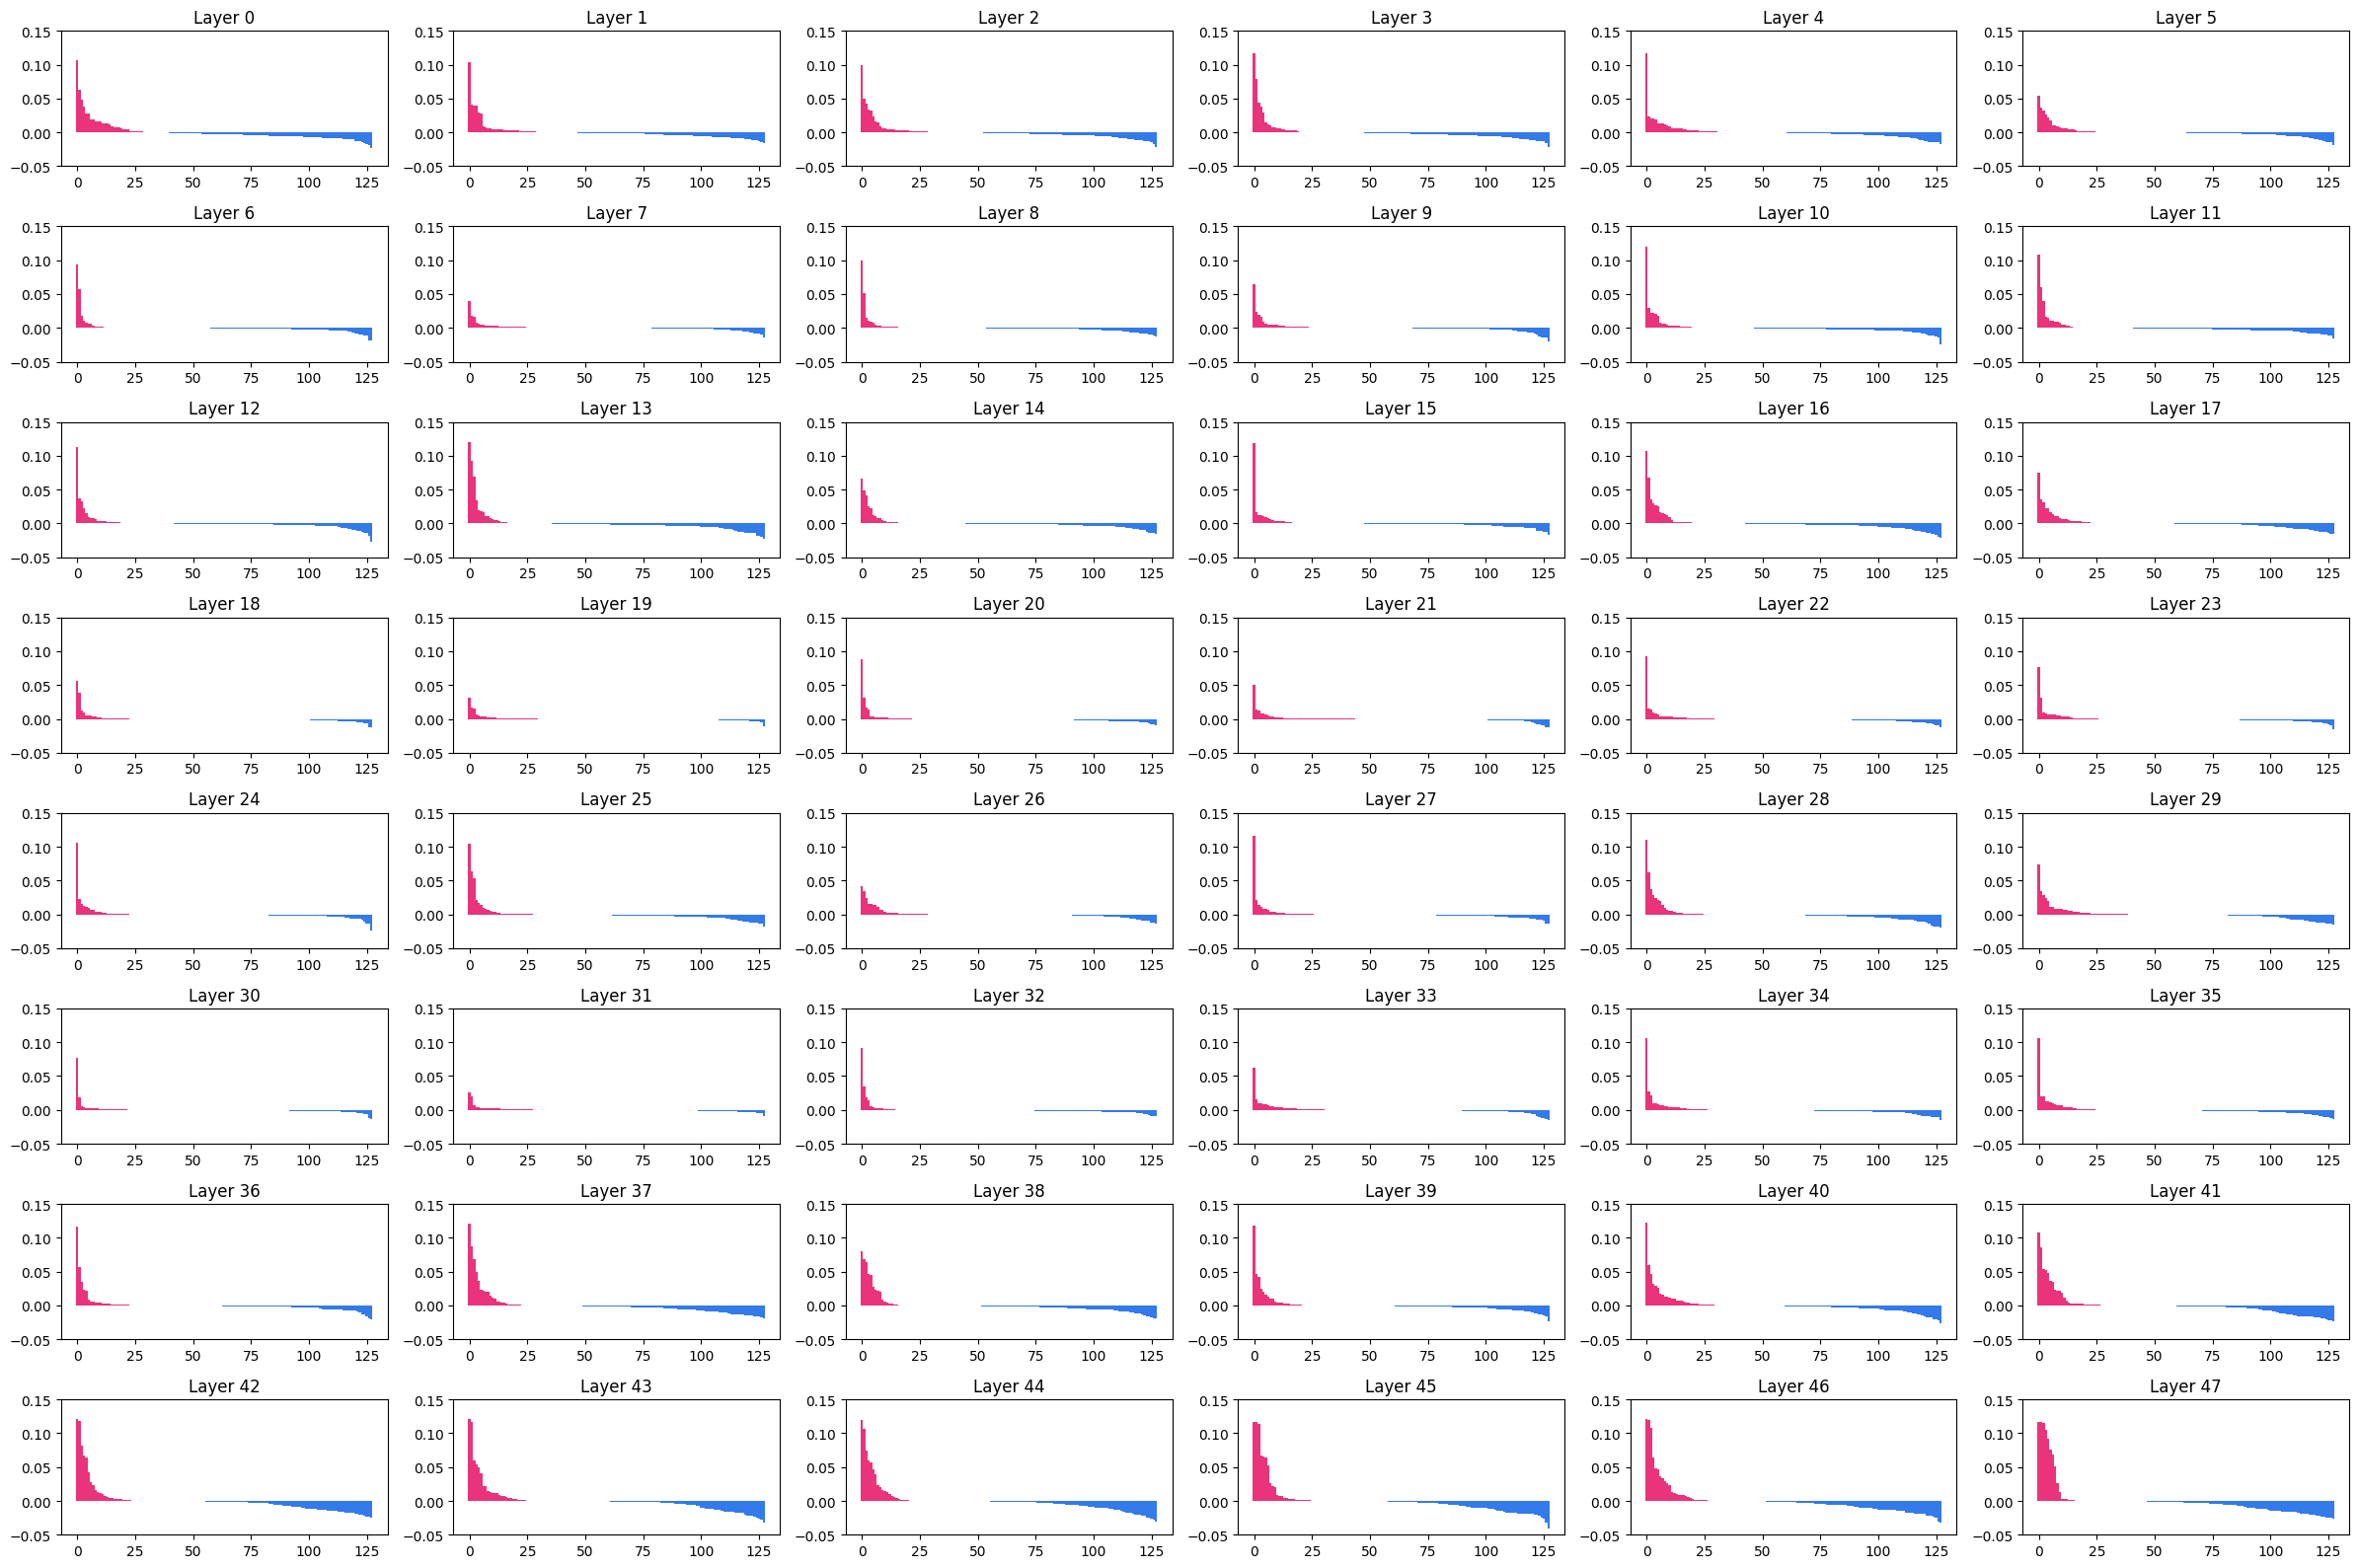

In [431]:
plt.figure(figsize=(24, 16))
for i in range(48):
    plt.subplot(8, 6, i+1)
    plt.bar(range(128), sorted(tt_gap[i])[::-1], width = 1.0, color = [cmap[int(x < 0)] for x in sorted(tt_gap[i])[::-1]])
    plt.ylim(-0.05, 0.15)
    plt.title(f"Layer {i}")
plt.tight_layout()
plt.savefig("images/expert_gap_full.png")

In [247]:
tt_fl_gap = first_ko_nt - last_ko_nt

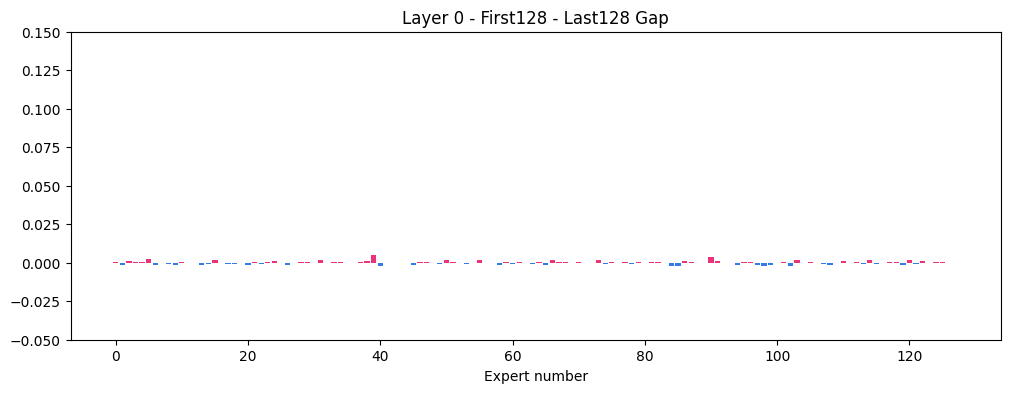

In [432]:
cmap = ['#EA337A', '#337AEA']
plt.figure(figsize=(12, 4))

plt.bar(range(128), tt_fl_gap[0], color = [cmap[int(x < 0)] for x in tt_fl_gap[0]])
plt.xlabel("Expert number")
plt.title("Layer 0 - First128 - Last128 Gap")
plt.ylim(-0.05, 0.15)
plt.savefig("images/expert_gap_fl.png")

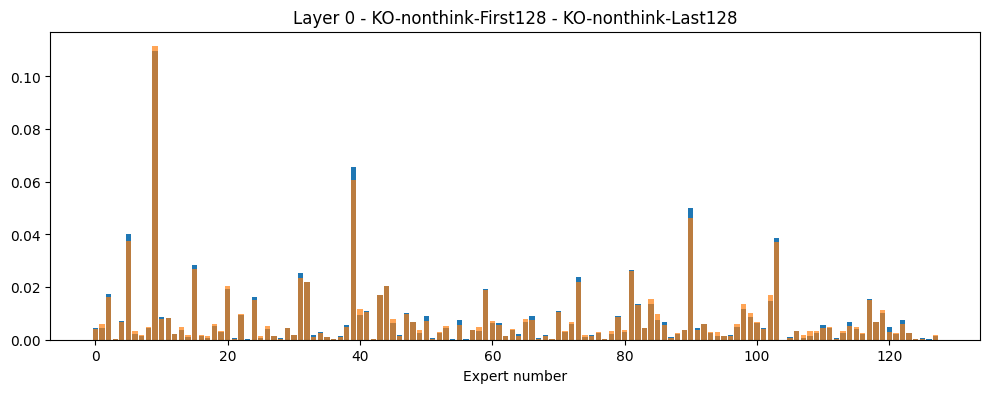

In [433]:
plt.figure(figsize=(12, 4))

plt.bar(range(128), first_ko_nt[0])
plt.bar(range(128), last_ko_nt[0], alpha = 0.7)
plt.xlabel("Expert number")
plt.title("Layer 0 - KO-nonthink-First128 - KO-nonthink-Last128")
plt.savefig("images/expert_comp_fl_no_sort.png")

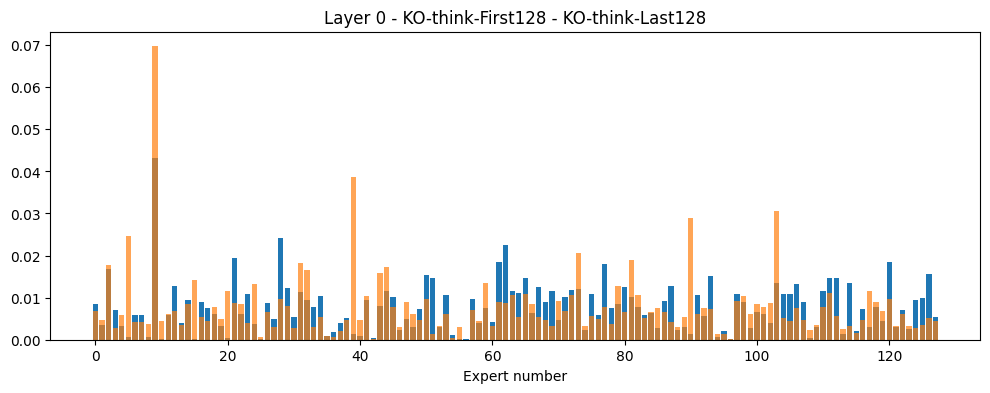

In [434]:
plt.figure(figsize=(12, 4))

plt.bar(range(128), first_ko_t[0])
plt.bar(range(128), last_ko_t[0], alpha = 0.7)
plt.xlabel("Expert number")
plt.title("Layer 0 - KO-think-First128 - KO-think-Last128")
plt.savefig("images/expert_comp_fl_no_sort_tnt.png")

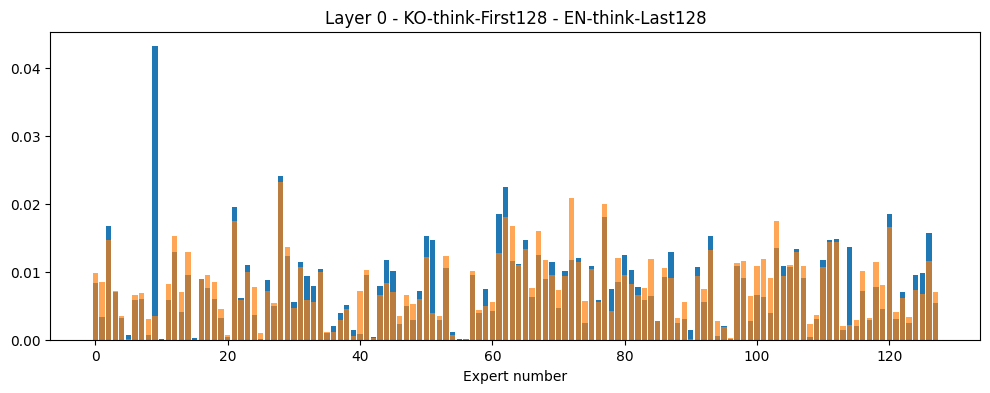

In [435]:
plt.figure(figsize=(12, 4))

plt.bar(range(128), first_ko_t[0])
plt.bar(range(128), last_en_t[0], alpha = 0.7)
plt.xlabel("Expert number")
plt.title("Layer 0 - KO-think-First128 - EN-think-Last128")
plt.savefig("images/expert_comp_fl_no_sort_koen.png")

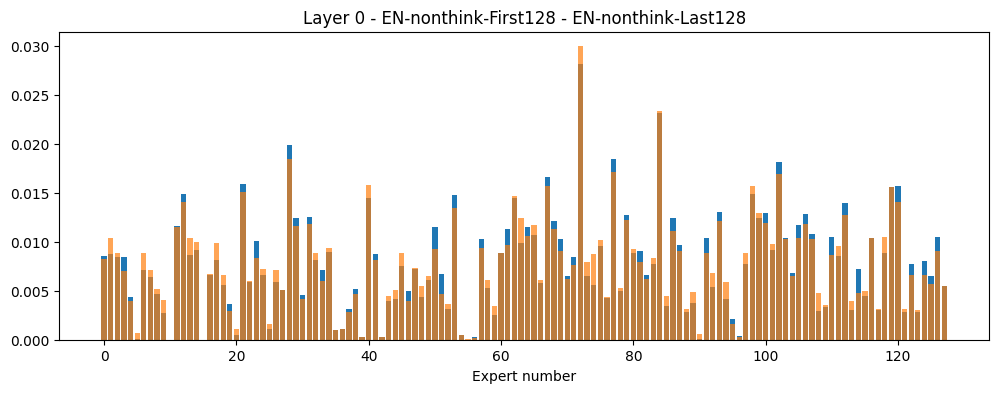

In [436]:
plt.figure(figsize=(12, 4))

plt.bar(range(128), first_en_nt[0])
plt.bar(range(128), last_en_nt[0], alpha = 0.7)
plt.xlabel("Expert number")
plt.title("Layer 0 - EN-nonthink-First128 - EN-nonthink-Last128")
plt.savefig("images/expert_comp_fl_no_sort_en.png")

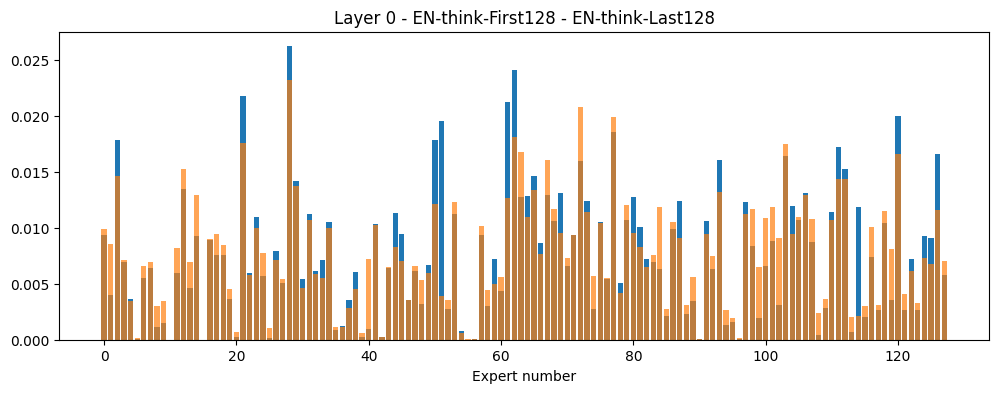

In [437]:
plt.figure(figsize=(12, 4))

plt.bar(range(128), first_en_t[0])
plt.bar(range(128), last_en_t[0], alpha = 0.7)
plt.xlabel("Expert number")
plt.title("Layer 0 - EN-think-First128 - EN-think-Last128")
plt.savefig("images/expert_comp_fl_no_sort_ent.png")

In [297]:
item_stat = np.array(ko_nt_data['output_stat'], dtype=np.int64)
subject = ko_nt_data['subject']

item_stat_t = np.array(ko_t_data['output_stat'], dtype=np.int64)
subject_t = ko_t_data['subject']

In [391]:
item_stat_en = np.array(en_nt_data['output_stat'], dtype=np.int64)
subject_en = en_nt_data['subject']


In [296]:
np.sum(item_stat[:,:,:] > 0, axis = -1).mean(axis=0)

array([108.91952713, 115.92344395,  97.77666999, 104.90371742,
        91.33171913,  92.72226179,  70.74996439,  70.02634952,
        81.46396525,  85.18060105,  94.79034326,  92.17162797,
        91.2428429 ,  91.71677824,  88.13046575,  84.34154679,
        84.67241134,  89.4384703 ,  67.74362626,  65.69904572,
        76.33371315,  84.06238428,  95.6917818 ,  95.69811993,
        92.14385415,  94.93868395,  88.2666999 ,  83.51922803,
        83.30387409,  89.93533685,  67.56053269,  68.86255519,
        77.93498077,  83.8020225 ,  93.08410483,  94.85764136,
        92.89453069,  89.26185729,  86.04507905,  82.44203105,
        82.9584817 ,  80.07413474,  69.40542658,  76.9222333 ,
        70.05305512,  67.30501353,  70.85251389,  57.0052699 ])

In [322]:
from sklearn.metrics.pairwise import cosine_similarity
res = cosine_similarity(item_stat.reshape(-1, 48*128), item_stat_t.reshape(-1, 48*128))

In [392]:
res2 = cosine_similarity(item_stat.reshape(-1, 48*128), item_stat_en.reshape(-1, 48*128))

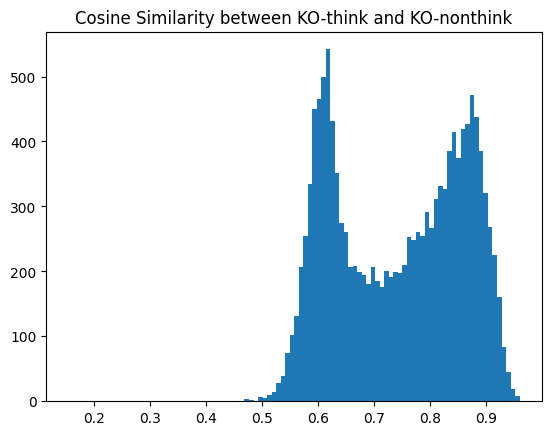

In [438]:
_ = plt.hist(res.diagonal(), bins=100)
plt.title("Cosine Similarity between KO-think and KO-nonthink")
plt.savefig("images/cos_tnt.png")

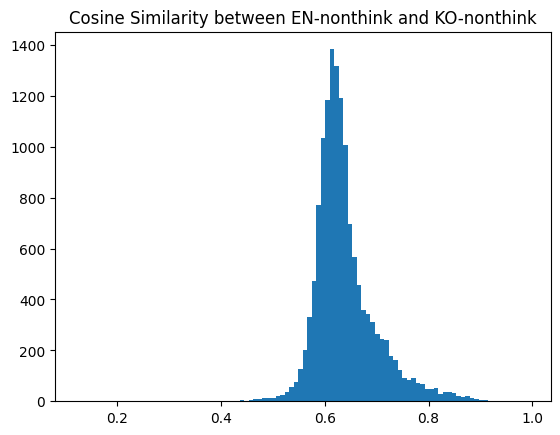

In [439]:
_ = plt.hist(res2.diagonal(), bins=100)
plt.title("Cosine Similarity between EN-nonthink and KO-nonthink")
plt.savefig("images/cos_enko.png")

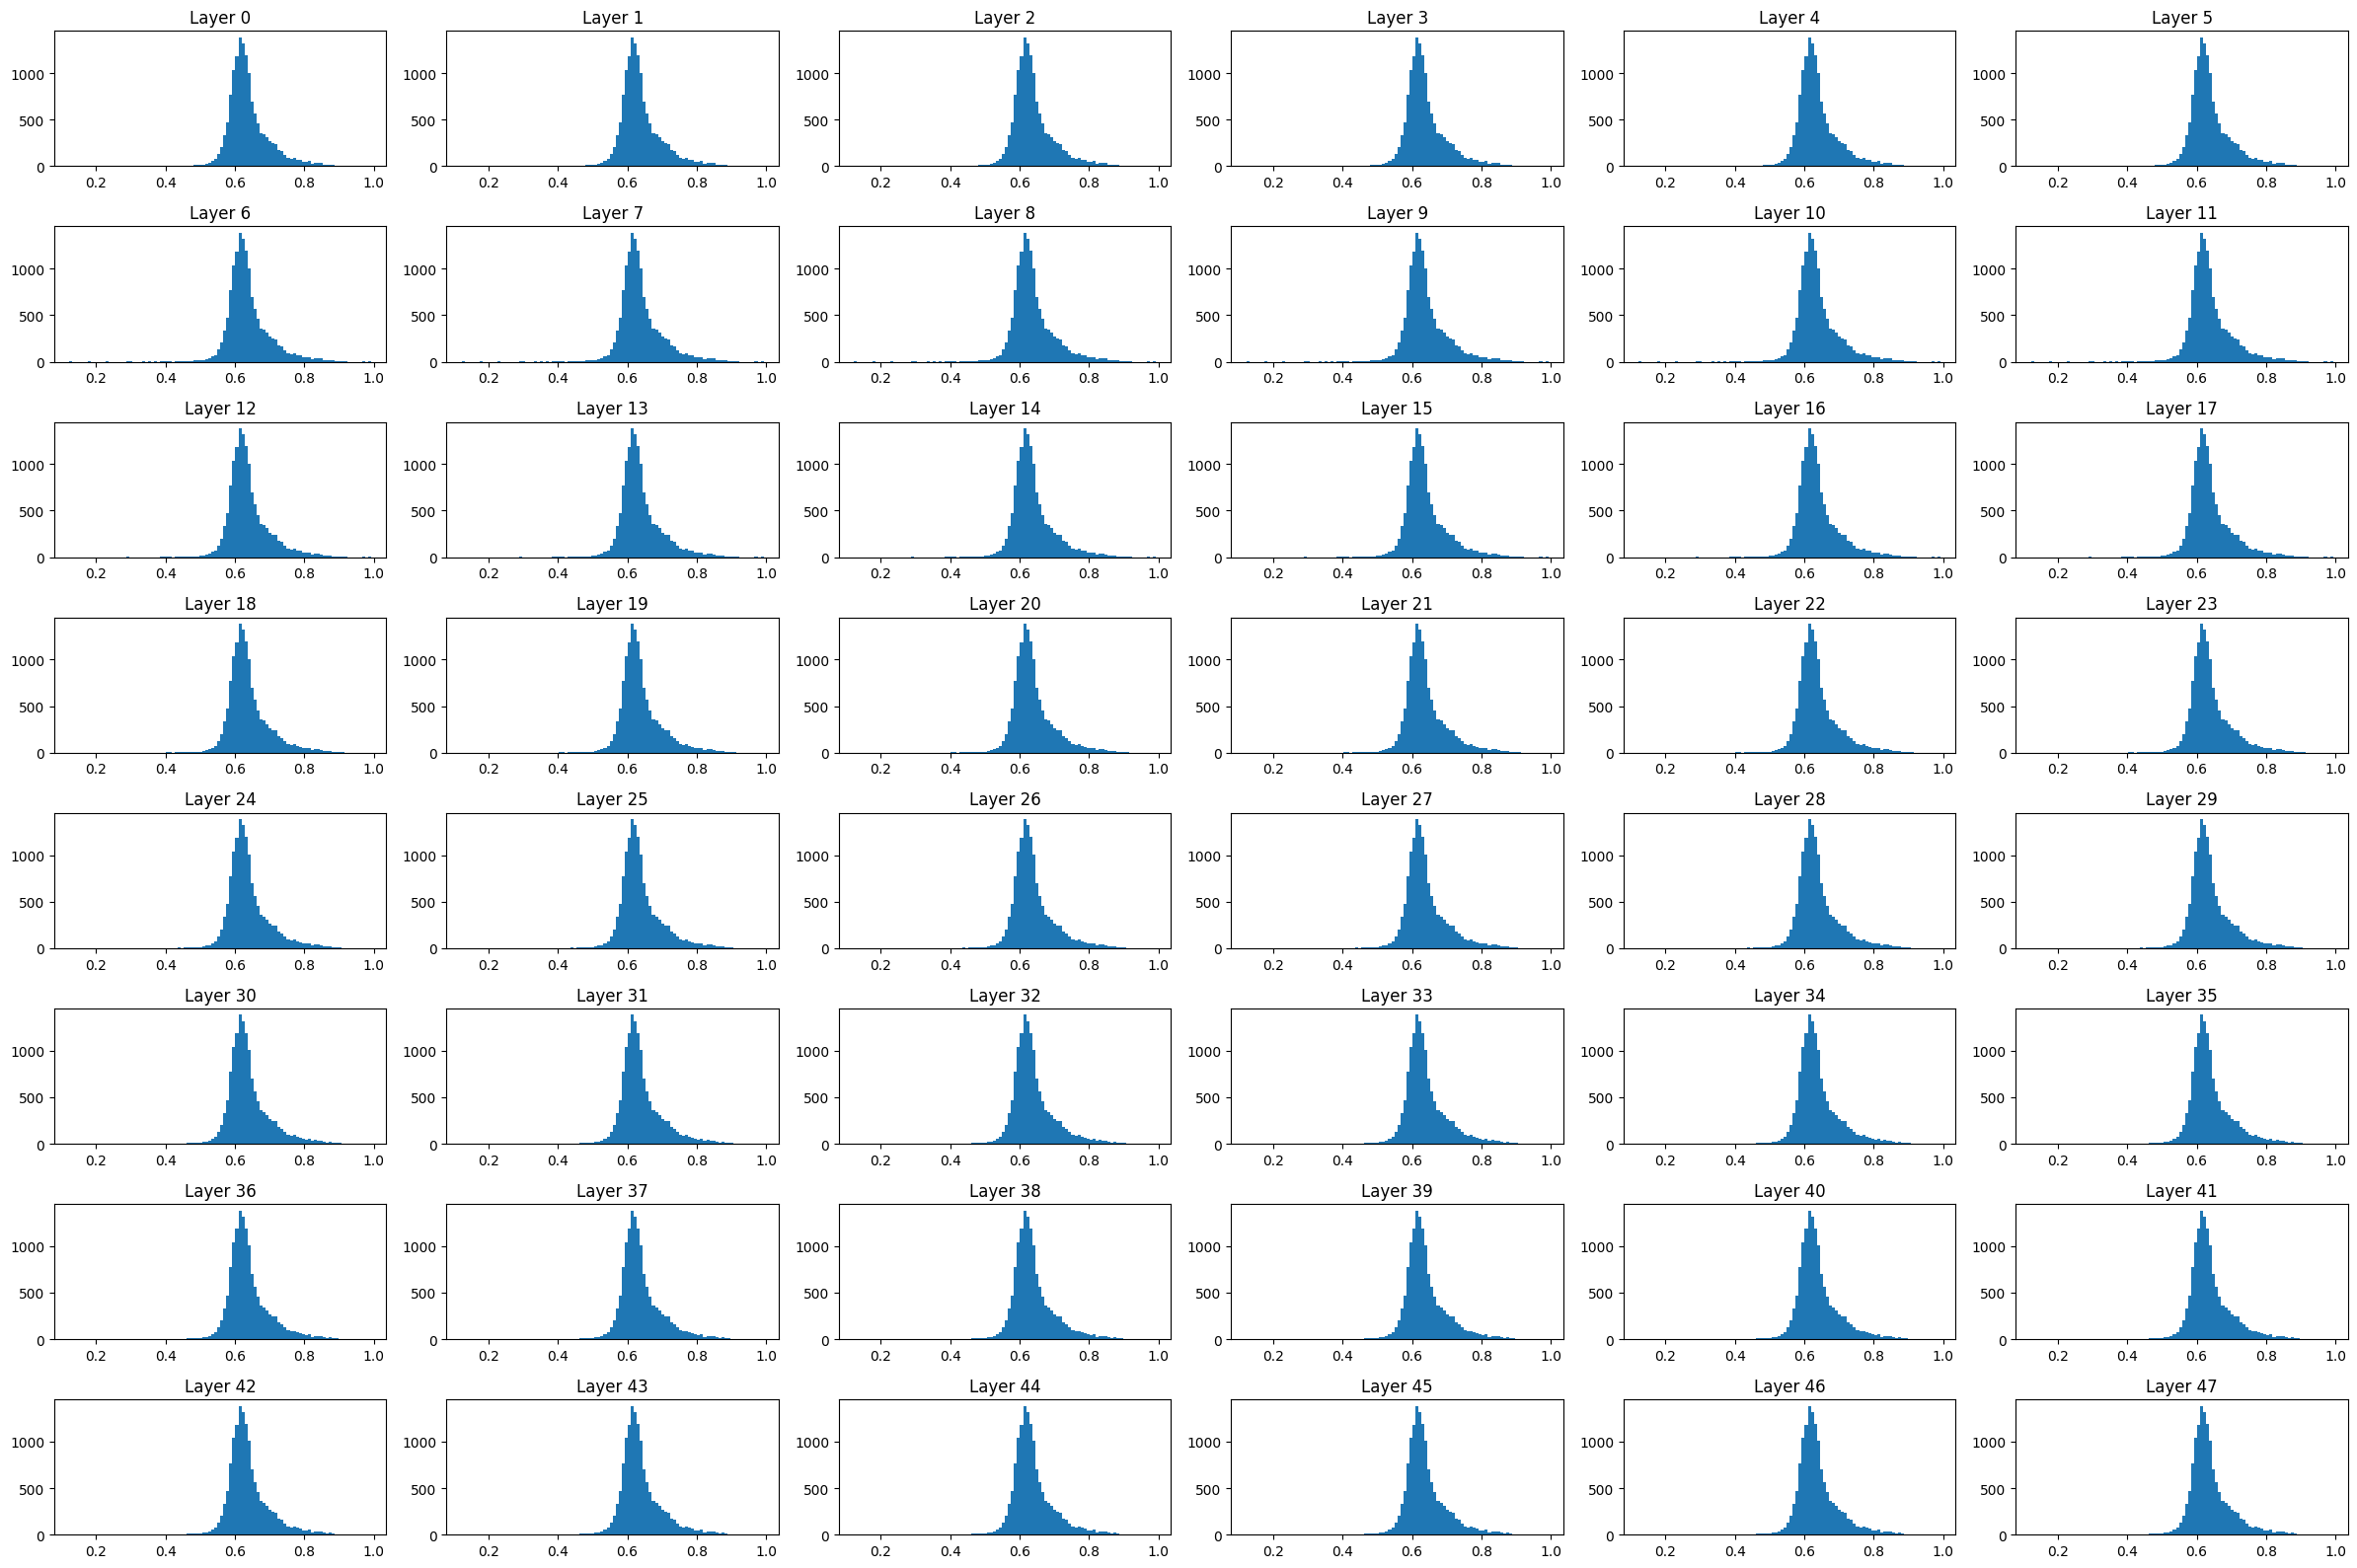

In [441]:
plt.figure(figsize=(24, 16))
for i in range(48):
    plt.subplot(8, 6, i+1)
    res3 = cosine_similarity(item_stat[:,i,:], item_stat_en[:,i,:])
    _ = plt.hist(res2.diagonal(), bins=100)
    plt.title(f"Layer {i}")
plt.tight_layout()
plt.savefig("images/cos_full_koen.png")

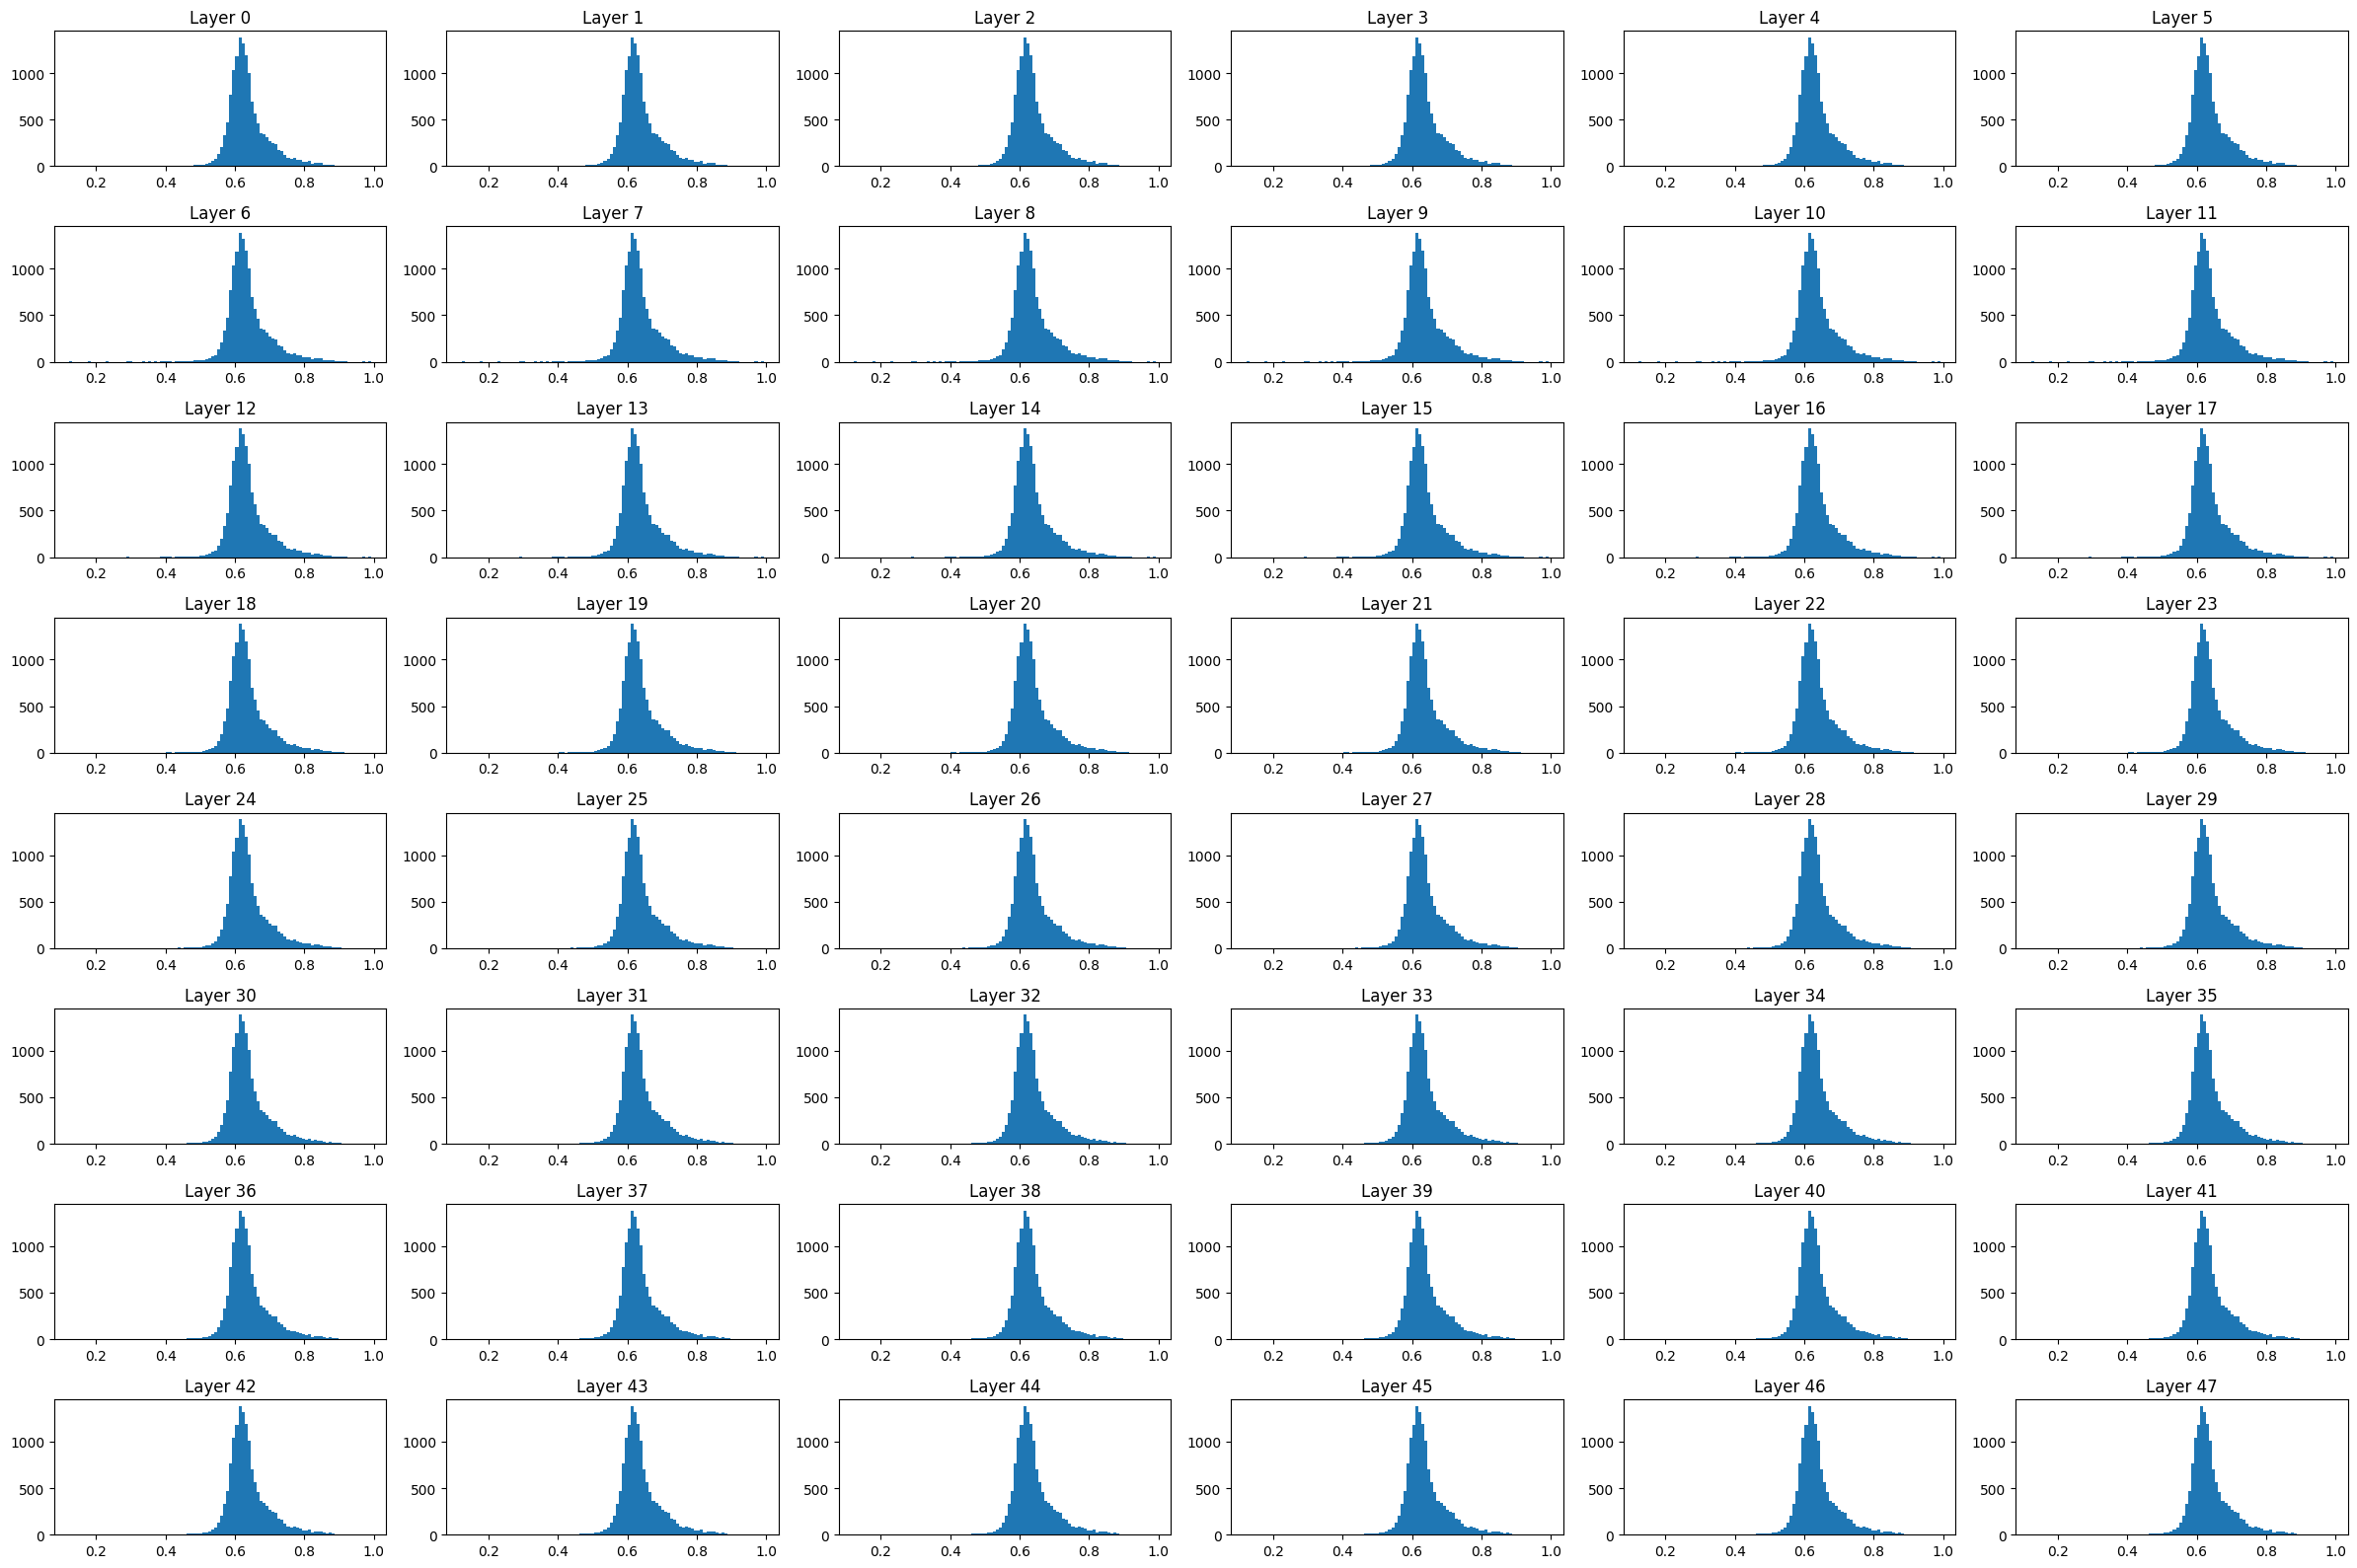

In [442]:
plt.figure(figsize=(24, 16))
for i in range(48):
    plt.subplot(8, 6, i+1)
    res3 = cosine_similarity(item_stat[:,i,:], item_stat_t[:,i,:])
    _ = plt.hist(res2.diagonal(), bins=100)
    plt.title(f"Layer {i}")
plt.tight_layout()
plt.savefig("images/cos_full_tnt.png")

In [351]:
np.where(res.diagonal() > 0.95)

(array([  525,  3745,  5099,  6201,  6413,  9460,  9464, 12335, 12551,
        13172, 13501]),)

In [353]:
ko_t_data[525]['output']

"<think>\nOkay, let's see. The question is asking what is embedded in the inner mitochondrial membrane. The options are (A) enzymes of the citric acid cycle, (B) components of the electron transport chain, (C) glycogen molecules, (D) triglyceride molecules.\n\nFirst, I need to recall the structure and functions of mitochondria. Mitochondria have an outer membrane and an inner membrane. The inner membrane is where the electron transport chain (ETC) is located, right? The ETC is crucial for ATP production through oxidative phosphorylation. So maybe option B is correct.\n\nBut wait, what about the citric acid cycle? I think the citric acid cycle, also known as the Krebs cycle, takes place in the mitochondrial matrix. The enzymes for that cycle are in the matrix, not embedded in the inner membrane. So option A might not be correct.\n\nAs for glycogen and triglycerides, those are storage forms of energy. Glycogen is mainly stored in the liver and muscles, while triglycerides are stored in a

In [352]:
ko_nt_data[525]['output']

'미토콘드리아의 **내부 막**(inner membrane)에 내재되어 있는 것은:\n\n**(B) 전자 전달계의 성분.**\n\n---\n\n### 해설:\n\n미토콘드리아는 **세포 호흡**의 주요 장소로, **전자 전달계**(electron transport chain, ETC)와 **산화적 인산화**(oxidative phosphorylation)가 주로 일어납니다. 이 과정은 **미토콘드리아의 내부 막**(inner membrane)에서 일어납니다.\n\n- **(A) 시트르산 회로(크렙스 회로)의 효소**: 이는 **미토콘드리아 매트릭스**(matrix)에 존재합니다.  \n- **(B) 전자 전달계의 성분**: 이는 **내부 막**에 고정되어 있습니다.  \n- **(C) 글리코겐 분자**: 주로 **간**이나 **근육**에 저장되며, 미토콘드리아에는 존재하지 않습니다.  \n- **(D) 트리아실글리세롤 분자**: 이는 주로 **지방세포**에 저장되는 지방 저장 형태이며, 미토콘드리아에 내재되어 있지는 않습니다.\n\n---\n\n### 정답: **(B) 전자 전달계의 성분.** ✅'

In [386]:
np.where(res.diagonal() < 0.5)

(array([ 1368,  1526,  1590,  1975,  2617,  2967,  3537,  5382,  6210,
         6989,  7843,  7896,  8036,  8493,  9196, 10276, 13597]),)

In [388]:
ko_t_data[1368]['output']

'<think>\nOkay, so I need to figure out which of the given options can penetrate the descending limb of the loop of Henle. Let me start by recalling what I know about the nephron and the loop of Henle. \n\nThe nephron is the functional unit of the kidney, and the loop of Henle is part of it. The loop has two main parts: the descending limb and the ascending limb. The question is about the descending limb, specifically the "하행각 헨리 고리" which I think translates to the descending limb of the loop of Henle.\n\nNow, I remember that the loop of Henle plays a crucial role in the concentration of urine. The descending limb is permeable to water but not to solutes like sodium or chloride. The ascending limb, on the other hand, is permeable to solutes but not to water. This difference helps in creating the concentration gradient in the medulla.\n\nSo, if the descending limb is permeable to water, then water (H2O) can pass through it. But what about the other ions? Sodium (Na+), potassium (K+), an

In [389]:
ko_nt_data[1368]['output']

"신장의 **네프론**은 소변 생성의 기본 단위로, **수렴관**과 **헨리 고리**(Henle's loop)로 구성됩니다. 이 중 **하행각 헨리 고리**(descending limb of Henle's loop)는 **수분(물)**이 자유롭게 통과할 수 있지만, **이온**은 거의 통과하지 못합니다.\n\n### 하행각 헨리 고리의 특징:\n- **수분(H2O)**: **통과 가능** (이유: 수분은 수분 채널을 통해 쉽게 통과)\n- **Na+, K+, Cl-**: **통과 불가** (이온은 수분 채널을 통해 통과하지 못함)\n\n### 정답:\n**(B) H2O**\n\n---\n\n### 추가 설명:\n- **상행각 헨리 고리**(ascending limb of Henle's loop)는 **이온**(Na+, Cl-, K+)을 펌프로 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통해 펌프를 통

In [275]:
np.unique(subject)

array(['abstract_algebra', 'anatomy', 'astronomy', 'business_ethics',
       'clinical_knowledge', 'college_biology', 'college_chemistry',
       'college_computer_science', 'college_mathematics',
       'college_medicine', 'college_physics', 'computer_security',
       'conceptual_physics', 'econometrics', 'electrical_engineering',
       'elementary_mathematics', 'formal_logic', 'global_facts',
       'high_school_biology', 'high_school_chemistry',
       'high_school_computer_science', 'high_school_european_history',
       'high_school_geography', 'high_school_government_and_politics',
       'high_school_macroeconomics', 'high_school_mathematics',
       'high_school_microeconomics', 'high_school_physics',
       'high_school_psychology', 'high_school_statistics',
       'high_school_us_history', 'high_school_world_history',
       'human_aging', 'human_sexuality', 'international_law',
       'jurisprudence', 'logical_fallacies', 'machine_learning',
       'management', 'marketing

In [277]:
color_list = []

# 1. tab20 (20 colors)
color_list += plt.cm.tab20(np.linspace(0, 1, 20)).tolist()

# 2. tab10 (10 colors)
color_list += plt.cm.tab10(np.linspace(0, 1, 10)).tolist()

# 3. Set3 (12 colors)
color_list += plt.cm.Set3(np.linspace(0, 1, 12)).tolist()

# 4. Pastel1 (9 colors)
color_list += plt.cm.Pastel1(np.linspace(0, 1, 9)).tolist()

# 5. hsv (6 colors - evenly spaced hues)
color_list += plt.cm.hsv(np.linspace(0, 1, 6)).tolist()

# 총 57개로 잘렸는지 확인
color_list = color_list[:57]

color_dict = {}
for s in subject:
    if s not in color_dict:
        color_dict[s] = color_list[len(color_dict)]

In [264]:
from sklearn.manifold import TSNE

In [444]:
model = TSNE(n_components=2)
X_embedded = model.fit_transform(item_stat.reshape(-1, 48*128) / item_stat.reshape(-1, 48*128).sum(axis=1, keepdims=True))

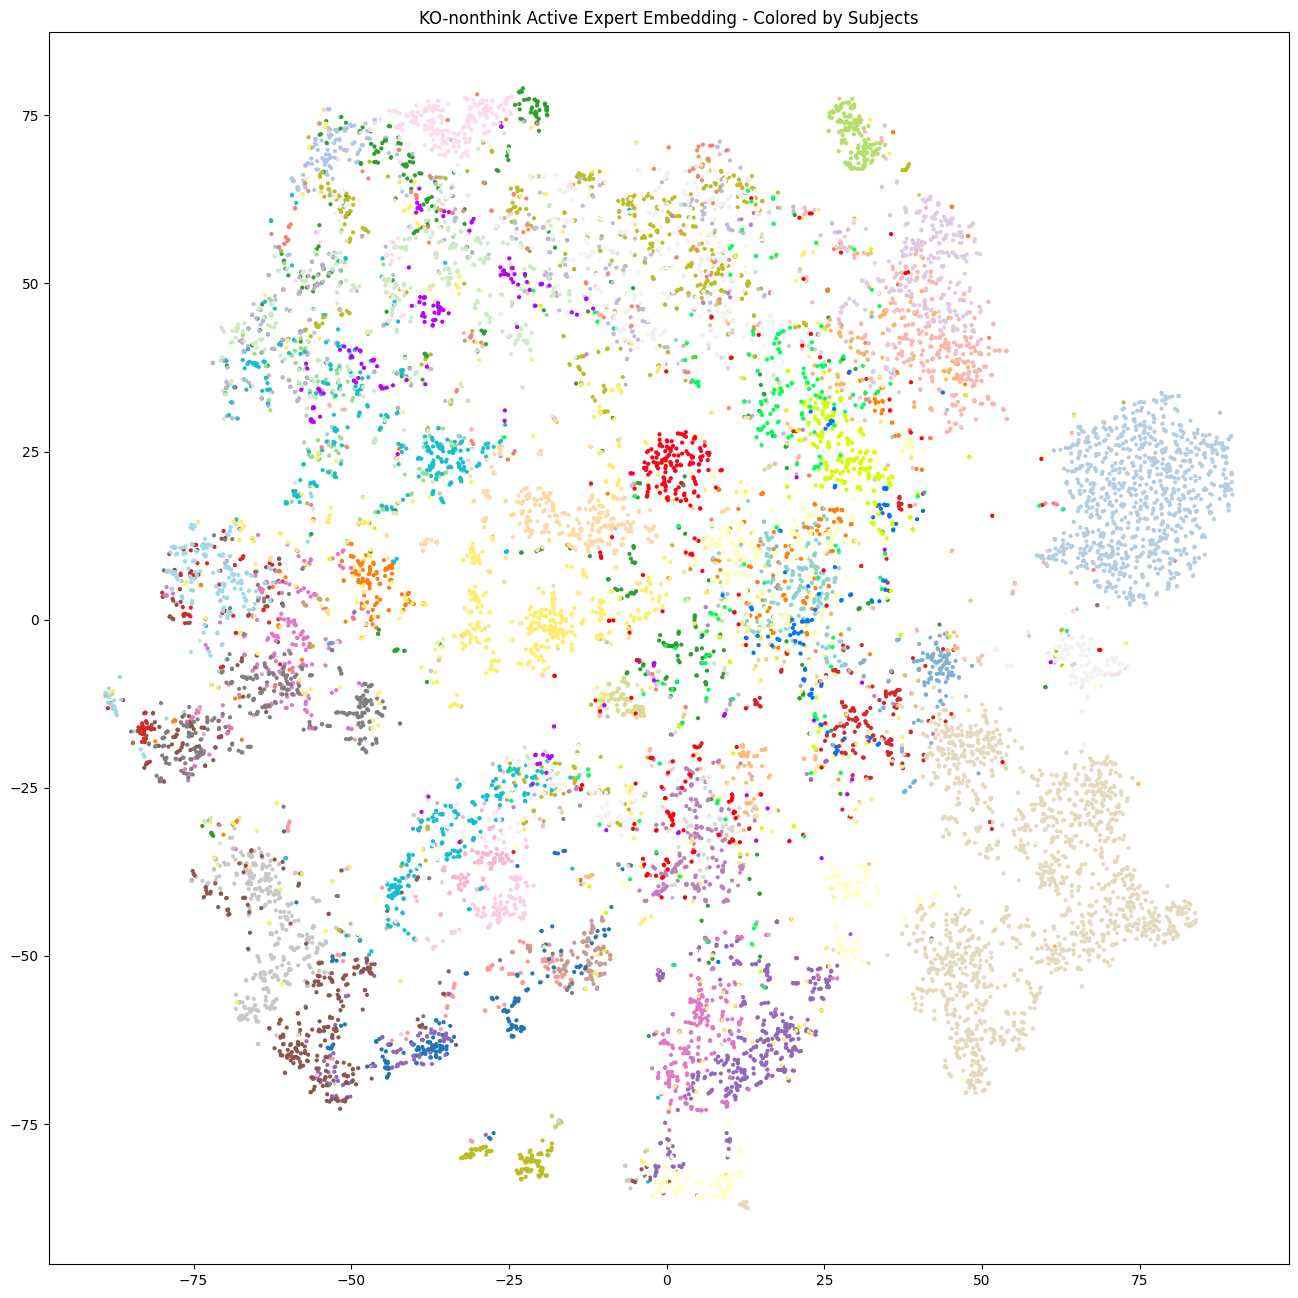

In [445]:
plt.figure(figsize=(16, 16))
c_list = [color_dict[s] for s in subject]
plt.scatter(X_embedded[:,0], X_embedded[:,1], s= 4, color=c_list)
plt.title("KO-nonthink Active Expert Embedding - Colored by Subjects")
plt.savefig("images/tsne_nt.png")

In [446]:
model = TSNE(n_components=2)
X_embedded = model.fit_transform(item_stat_t.reshape(-1, 48*128) / item_stat_t.reshape(-1, 48*128).sum(axis=1, keepdims=True))

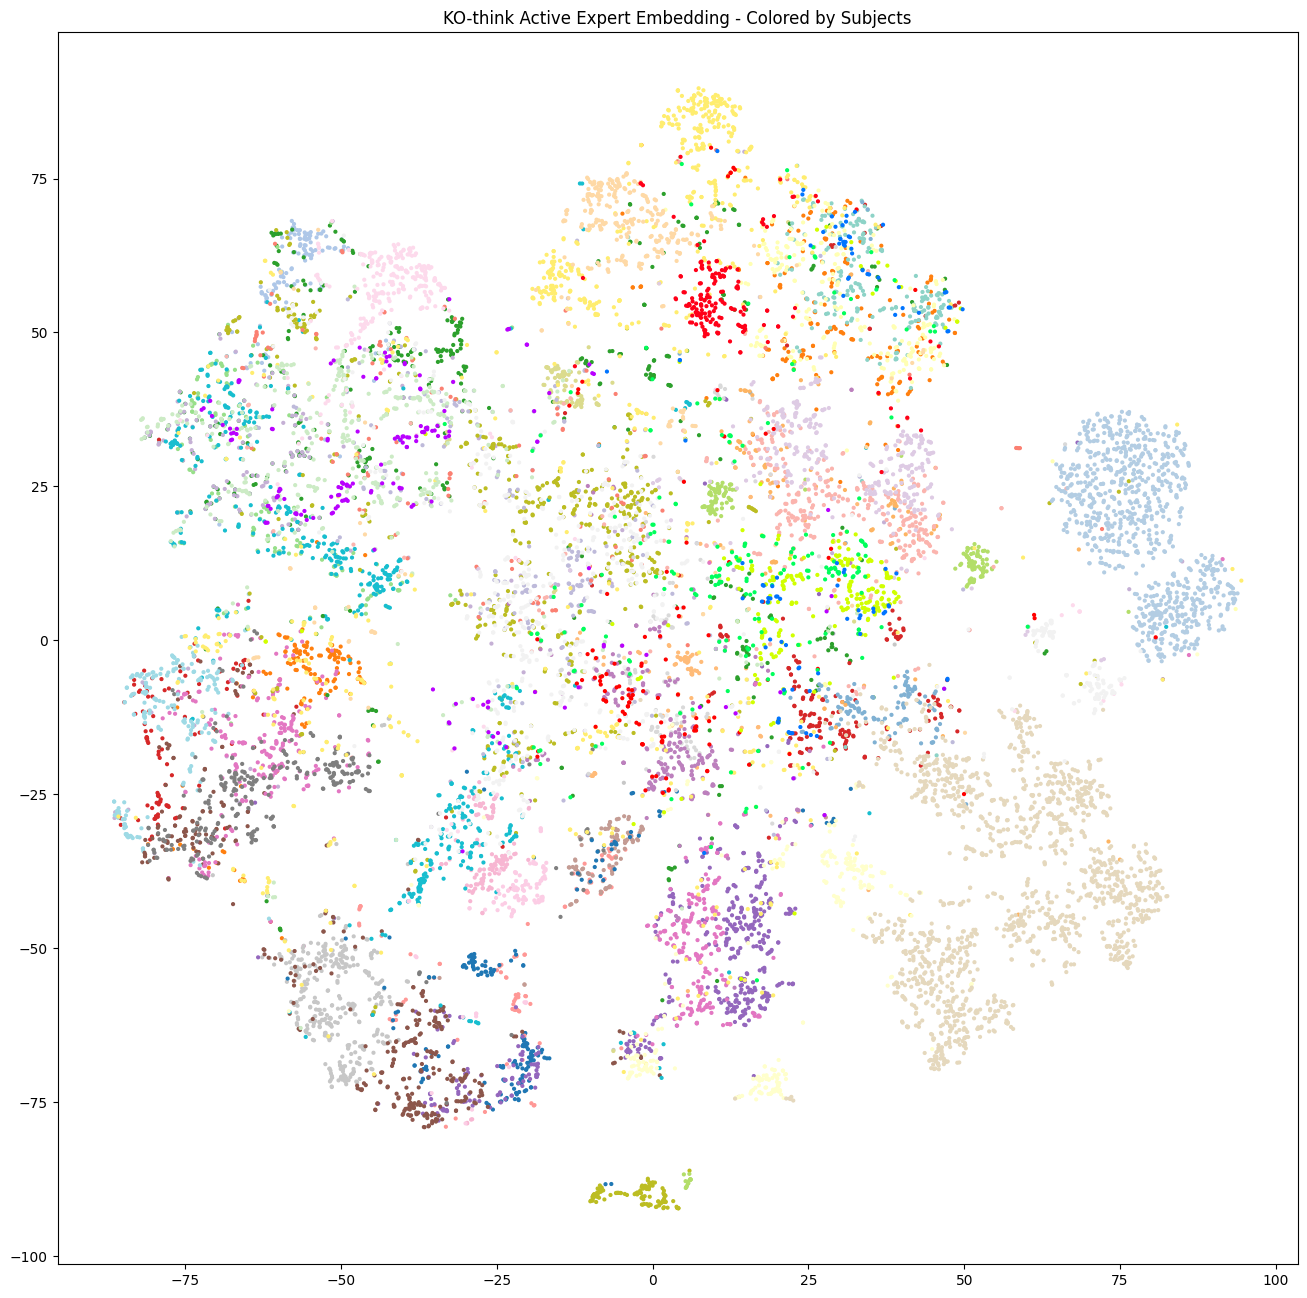

In [447]:
plt.figure(figsize=(16, 16))
c_list = [color_dict[s] for s in subject_t]
plt.scatter(X_embedded[:,0], X_embedded[:,1], s= 4, color=c_list)
plt.title("KO-think Active Expert Embedding - Colored by Subjects")
plt.savefig("images/tsne_t.png")

In [ ]:
model = TSNE(n_components=2)
X_embedded = model.fit_transform(item_stat_en.reshape(-1, 48*128) / item_stat_en.reshape(-1, 48*128).sum(axis=1, keepdims=True))

In [ ]:
plt.figure(figsize=(16, 16))
c_list = [color_dict[s] for s in subject_t]
plt.scatter(X_embedded[:,0], X_embedded[:,1], s= 4, color=c_list)
plt.title("EN-nonthink Active Expert Embedding - Colored by Subjects")
plt.savefig("images/tsne_en_nt.png")